In [1]:
# This notebook analyzes cookies from crawl NL
# (Run with Python 3.6.1 |Anaconda 4.4.0 )

# Th# This notebook analyzes cookies from crawl NL
# (Run with Python 3.6.1 |Anaconda 4.4.0 )

# The crawl includes 4 vantage points and top 30 websites from NL,BG,DE,US, and 61 from US (no DNT).
# The aim is to understanding cookie-variations well enough to design a good country-cookie-metric.
# (E.g., one site, cookie variations for site based on vantage, and between sites, top-3rd parties, ...)
# (Later, this metric will be linked with site and country characteristics in a regression model.)

%pylab inline --no-import-all 
import pandas as pd
import sqlite3
from numpy import nan
from time import time
from glob import glob
from datetime import datetime
import numpy as np
#from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from tldextract import extract as tldextract  # pip install tldextract
DPI = 120  # used for graphs. check at: http://www.infobyip.com/detectmonitordpi.php

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Two functions that Hadi had to extract domains 

#Function to remove the http, https of site_url
def strip_site(site):
    """Removes leading http:// or https:// and trailing '/'"""
    site = site.lower()
    if site.startswith('http'):
        site = site.replace('https://', '').replace('http://', '')
    if site.endswith('/'):
        site = site[:-1]
    return site

#Function to strip and extract the domains of site_url
def extract_domain(site):
    """Returns domain+tld from a full domain"""
    site = strip_site(site)  # just to be sure
    ext = tldextract(site)
    ret = ".".join([ss for ss in ext[-2:] if ss])
    # In case of gov.ie, or IPs, our 'ret' works better than 'ext.registered_domain'
    return ret

#Function to extract the domains of host
def extract_host(host):
    """Returns domain+tld from a full domain"""
    ext = tldextract(host)
    ret = ".".join([ss for ss in ext[-2:] if ss])
    return ret

#Function to extract the TLD of the websites
def extract_tld(site):
    """Returns domain+tld from a full domain"""
    site = strip_site(site)  # just to be sure
    ext = tldextract(site)
    ret = ".".join([ss for ss in ext[-1:] if ss])
    return ret



### SUCCESS OF THE CRAWL PER VANTAGE POINT

In [3]:
#Read successful crawls

#Connection to the SQLite Database US to create US_S(United States Success) data frame
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Thesis\\NewData\\crawl.20180313.2344\\from-US\\crawl-data.sqlite')
#Query to get all websites and bool_success and add them in a dataframe 
US_S=pd.read_sql_query("""SELECT site_url, bool_success 
                    FROM site_visits s 
                    LEFT JOIN CrawlHistory h ON
s.site_url=replace(replace(h.arguments, '[http://]http://', ''), '[https://]https://', '') AND command='GET'                     
""", con)
    
print('crawled US sites',(US_S.site_url.count()))
success=US_S[US_S.bool_success==1].count()['bool_success']
print('success US', success)

#Connection to the SQLite Database NL and doing the query to create NL_S(Netherland Success) data frame
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Thesis\\NewData\\crawl.20180313.2344\\from-NL\\crawl-data.sqlite')
#Query to get all websites and bool_success and add them in a dataframe 
NL_S=pd.read_sql_query("""SELECT site_url, bool_success 
                    FROM site_visits s 
                    LEFT JOIN CrawlHistory h ON
s.site_url=replace(replace(h.arguments, '[http://]http://', ''), '[https://]https://', '') AND command='GET'                     
""", con)
    
print('crawled NL sites',(NL_S.site_url.count()))
success=NL_S[NL_S.bool_success==1].count()['bool_success']
print('success NL', success)

#Connection to the SQLite Database DE and doing the query to create DE_S (Germany success) data frame
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Thesis\\NewData\\crawl.20180313.2344\\from-DE\\crawl-data.sqlite')
#Query to get all websites and bool_success and add them in a dataframe 
DE_S=pd.read_sql_query("""SELECT site_url, bool_success 
                    FROM site_visits s 
                    LEFT JOIN CrawlHistory h ON
s.site_url=replace(replace(h.arguments, '[http://]http://', ''), '[https://]https://', '') AND command='GET'                     
""", con)

print('crawled DE sites',(DE_S.site_url.count()))
success=DE_S[DE_S.bool_success==1].count()['bool_success']
print('success DE', success)


#Connection to the SQLite Database GB and doing the query to create BG_S (Bulgaria success) data frame
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Thesis\\NewData\\crawl.20180313.2344\\from-GB\\crawl-data.sqlite')
#Query to get all websites and bool_success and add them in a dataframe 
BG_S=pd.read_sql_query("""SELECT site_url, bool_success 
                    FROM site_visits s 
                    LEFT JOIN CrawlHistory h ON
s.site_url=replace(replace(h.arguments, '[http://]http://', ''), '[https://]https://', '') AND command='GET'                     
""", con)
    
print('crawled BG sites',(BG_S.site_url.count()))
success=BG_S[BG_S.bool_success==1].count()['bool_success']
print('success BG', success)




crawled US sites 181
success US 131
crawled NL sites 181
success NL 138
crawled DE sites 181
success DE 132
crawled BG sites 181
success BG 136


In [4]:
#Comparing the success per vantage point

US_S.rename(columns={'bool_success':'bool_success_US'}, inplace=True)
NL_S.rename(columns={'site_url': 'site_NL', 'bool_success':'bool_success_NL'}, inplace=True)
DE_S.rename(columns={'site_url': 'site_DE', 'bool_success':'bool_success_DE'}, inplace=True)
BG_S.rename(columns={'site_url': 'site_BG', 'bool_success':'bool_success_BG'}, inplace=True)
check_success = pd.concat([US_S, NL_S,DE_S,BG_S], axis=1)
check_success.drop(['site_NL', 'site_DE','site_BG', ], axis=1, inplace=True)

check_success

#check_success.to_csv('out.csv', sep=',')

,site_url,bool_success_US,bool_success_NL,bool_success_DE,bool_success_BG
0,http://geoip.hidemyass.com,1,1,1,1
1,http://google.com,1,1,1,1
2,http://netflix.com,1,1,1,1
3,http://microsoft.com,1,1,1,1
4,http://facebook.com,1,1,1,1
5,http://google-analytics.com,1,1,1,1
6,http://googleapis.com,1,1,1,1
7,http://apple.com,1,1,1,1
8,http://youtube.com,1,1,1,1
9,http://googleusercontent.com,0,0,0,0


### LOADING THE MEASUREMENT DATA/COOKIES 
A data frame per vantage point is created

In [5]:
# Load the measurement data / cookies - VP:US
#Connect to SQLite Database
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Thesis\\NewData\\crawl.20180313.2344\\from-US\\crawl-data.sqlite')
#Query to get all cookies and add them in a dataframe
US=pd.read_sql_query("""SELECT site_url, host, name, value, is_session, change, expiry, creationTime
                          FROM site_visits s LEFT JOIN javascript_cookies c 
                          ON s.visit_id=c.visit_id ORDER BY s.visit_id""", con)
US['VP']='US'
US.head()
#US.shape

,site_url,host,name,value,is_session,change,expiry,creationTime,VP
0,http://geoip.hidemyass.com,.hidemyass.com,_gat_UA-950416-58,1,0.0,added,2018-03-14 01:58:20,2018-03-14 01:57:20,US
1,http://geoip.hidemyass.com,.hidemyass.com,_gid,GA1.2.930280486.1520992640,0.0,added,2018-03-15 01:57:20,2018-03-14 01:57:20,US
2,http://geoip.hidemyass.com,.hidemyass.com,_ga,GA1.2.1293913234.1520992640,0.0,added,2020-03-13 01:57:20,2018-03-14 01:57:20,US
3,http://geoip.hidemyass.com,www.hidemyass.com,hidemyassComLocale,en-us,0.0,added,2038-12-31 23:59:59,2018-03-14 01:57:20,US
4,http://geoip.hidemyass.com,.doubleclick.net,test_cookie,CheckForPermission,0.0,added,2018-03-14 02:12:21,2018-03-14 01:57:21,US


In [6]:
# Load the measurement data / cookies - VP:NL
#Connect to SQLite Database
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Thesis\\NewData\\crawl.20180313.2344\\from-NL\\crawl-data.sqlite')
#Query to get all cookies and add them in a dataframe
NL=pd.read_sql_query("""SELECT site_url, host, name, value, is_session, change, expiry, creationTime
                          FROM site_visits s LEFT JOIN javascript_cookies c 
                          ON s.visit_id=c.visit_id ORDER BY s.visit_id""", con)
NL['VP']='NL'
NL.head()
#NL.shape

,site_url,host,name,value,is_session,change,expiry,creationTime,VP
0,http://geoip.hidemyass.com,.hidemyass.com,_gat_UA-950416-58,1,0.0,added,2018-03-14 00:32:50,2018-03-14 00:31:50,NL
1,http://geoip.hidemyass.com,.doubleclick.net,test_cookie,CheckForPermission,0.0,added,2018-03-14 00:46:50,2018-03-14 00:31:50,NL
2,http://geoip.hidemyass.com,.hidemyass.com,_uetsid,_uet07c156d4,0.0,added,2018-03-14 01:01:50,2018-03-14 00:31:50,NL
3,http://geoip.hidemyass.com,.hidemyass.com,_gid,GA1.2.975656042.1520987510,0.0,added,2018-03-15 00:31:50,2018-03-14 00:31:50,NL
4,http://geoip.hidemyass.com,.bing.com,MUID,34FCAA0418D266821157A1B61CD265C6,0.0,added,2019-04-08 00:31:50,2018-03-14 00:31:50,NL


In [7]:
# Load the measurement data / cookies - VP: DE
#Connect to SQLite Database
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Thesis\\NewData\\crawl.20180313.2344\\from-DE\\crawl-data.sqlite')
#Query to get all cookies and add them in a dataframe
DE=pd.read_sql_query("""SELECT site_url, host, name, value, is_session, change, expiry, creationTime
                          FROM site_visits s LEFT JOIN javascript_cookies c 
                          ON s.visit_id=c.visit_id ORDER BY s.visit_id""", con)

DE['VP']='DE'
DE.head()
#DE.shape

,site_url,host,name,value,is_session,change,expiry,creationTime,VP
0,http://geoip.hidemyass.com,.hidemyass.com,_gid,GA1.2.1622646453.1520990095,0.0,added,2018-03-15 01:14:54,2018-03-14 01:14:54,DE
1,http://geoip.hidemyass.com,.hidemyass.com,_ga,GA1.2.2079942532.1520990095,0.0,added,2020-03-13 01:14:54,2018-03-14 01:14:54,DE
2,http://geoip.hidemyass.com,www.hidemyass.com,hidemyassComLocale,de-de,0.0,added,2038-12-31 23:59:59,2018-03-14 01:14:54,DE
3,http://geoip.hidemyass.com,.hidemyass.com,_gat_UA-950416-58,1,0.0,added,2018-03-14 01:15:55,2018-03-14 01:14:55,DE
4,http://geoip.hidemyass.com,.doubleclick.net,test_cookie,CheckForPermission,0.0,added,2018-03-14 01:29:55,2018-03-14 01:14:55,DE


In [8]:
# Load the measurement data / cookies - BG
#Connect to SQLite Database
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Thesis\\NewData\\crawl.20180313.2344\\from-GB\\crawl-data.sqlite')
#Query to get all cookies and add them in a dataframe
BG=pd.read_sql_query("""SELECT site_url, host, name, value, is_session, change, expiry, creationTime
                          FROM site_visits s LEFT JOIN javascript_cookies c 
                          ON s.visit_id=c.visit_id ORDER BY s.visit_id""", con)
BG['VP']='BG'
BG.head()


#b_t=BG[(BG.site_url=='http://1und1.de')&(BG.VP=='BG')] #This is to check if the uploaded data is equal to what I had in the DB
#b_t.shape
#BG.shape

,site_url,host,name,value,is_session,change,expiry,creationTime,VP
0,http://geoip.hidemyass.com,.hidemyass.com,_gat_UA-950416-58,1,0.0,added,2018-03-13 23:45:32,2018-03-13 23:44:32,BG
1,http://geoip.hidemyass.com,.hidemyass.com,_gid,GA1.2.1357100759.1520984672,0.0,added,2018-03-14 23:44:32,2018-03-13 23:44:32,BG
2,http://geoip.hidemyass.com,.hidemyass.com,_ga,GA1.2.644153563.1520984672,0.0,added,2020-03-12 23:44:32,2018-03-13 23:44:32,BG
3,http://geoip.hidemyass.com,www.hidemyass.com,hidemyassComLocale,en-gb,0.0,added,2038-12-31 23:59:59,2018-03-13 23:44:32,BG
4,http://geoip.hidemyass.com,.hidemyass.com,zte2095,1,1.0,added,9999-12-31 23:59:59,2018-03-13 23:44:32,BG


### CHECKING THE CRAWL SUCCESS (1) PER VP (DO CRAWLS WITH 1 DID GET COOKIES DATA? - FALSE POSITIVES
Also, check per VP if -1 did get or not data, as well as if 0 did not get data

In [9]:
#Check if bool_success_US =1 did get cookie data 
check_success_US = pd.merge(US,US_S, on='site_url')
#check_success_US.head()
check_success_US['host'].replace('None', np.nan, inplace=True)
check_success_US.loc[check_success_US['host'].isnull(), 'host'] = 'nd'
check_success_US.tail(300)
c_s_us=check_success_US[(check_success_US.host=='nd')&(check_success_US.bool_success_US==1)].reset_index()
c_s_us
#c_s_us.to_csv('false_positives_us.csv', sep=',')

#Checking if -1 get data or not get data (From 22 data points with -1, 8 did not get data, the rest does get data)
#u_t=check_success_US[(check_success_US.bool_success_US==-1)] 
#u_t.groupby('site_url').count().reset_index()
#u=check_success_US[(check_success_US.host=='nd')&(check_success_US.bool_success_US==-1)].reset_index()
#u.shape


#Check if unsuccesful = '0' did not get cookie data
#check_success_US[(check_success_US.host=='nd')&(check_success_US.bool_success_US==0)].reset_index()


,index,site_url,host,name,value,is_session,change,expiry,creationTime,VP,bool_success_US
0,271,http://googleapis.com,nd,None,None,NaN,None,None,None,US,1
1,289,http://googleadservices.com,nd,None,None,NaN,None,None,None,US,1
2,442,http://scorecardresearch.com,nd,None,None,NaN,None,None,None,US,1
3,737,http://casalemedia.com,nd,None,None,NaN,None,None,None,US,1
4,1041,http://app-measurement.com,nd,None,None,NaN,None,None,None,US,1
5,1042,http://rlcdn.com,nd,None,None,NaN,None,None,None,US,1
6,1084,http://quantserve.com,nd,None,None,NaN,None,None,None,US,1
7,1459,http://ccc.de,nd,None,None,NaN,None,None,None,US,1
8,1709,http://audiencemanager.de,nd,None,None,NaN,None,None,None,US,1
9,2256,http://t4ft.de,nd,None,None,NaN,None,None,None,US,1


In [10]:
#Check if bool_success_NL =1 did get data 
NL_S.rename(columns={'site_NL': 'site_url'}, inplace=True)
check_success_NL = pd.merge(NL,NL_S, on='site_url')
#check_success_NL.head()
check_success_NL['host'].replace('None', np.nan, inplace=True)
check_success_NL.loc[check_success_NL['host'].isnull(), 'host'] = 'nd'
#check_success_NL.tail(300)
c_s_nl=check_success_NL[(check_success_NL.host=='nd')&(check_success_NL.bool_success_NL==1)].reset_index()
c_s_nl
#c_s_nl.to_csv('false_positives_nl.csv', sep=',')


#Checking if -1 get data or not get data (From 15 data points with -1, 8 did not get data, the rest does get data)
#n_t=check_success_NL[(check_success_NL.bool_success_NL==-1)] 
#n_t.groupby('site_url').count().reset_index()
#n=check_success_NL[(check_success_NL.host=='nd')&(check_success_NL.bool_success_NL==-1)].reset_index()
#n.shape


#Check if unsuccesful = '0' did not get cookie data
#check_success_NL[(check_success_NL.host=='nd')&(check_success_NL.bool_success_NL==0)].reset_index()

,index,site_url,host,name,value,is_session,change,expiry,creationTime,VP,bool_success_NL
0,49,http://facebook.com,nd,None,None,NaN,None,None,None,NL,1
1,61,http://googleapis.com,nd,None,None,NaN,None,None,None,NL,1
2,79,http://googleadservices.com,nd,None,None,NaN,None,None,None,NL,1
3,373,http://scorecardresearch.com,nd,None,None,NaN,None,None,None,NL,1
4,579,http://bluekai.com,nd,None,None,NaN,None,None,None,NL,1
5,640,http://casalemedia.com,nd,None,None,NaN,None,None,None,NL,1
6,796,http://app-measurement.com,nd,None,None,NaN,None,None,None,NL,1
7,797,http://rlcdn.com,nd,None,None,NaN,None,None,None,NL,1
8,833,http://quantserve.com,nd,None,None,NaN,None,None,None,NL,1
9,1171,http://ccc.de,nd,None,None,NaN,None,None,None,NL,1


In [11]:
#Check if bool_success_DE =1 did get data 
DE_S.rename(columns={'site_DE': 'site_url'}, inplace=True)
check_success_DE = pd.merge(DE,DE_S, on='site_url')
#check_success_DE.head()
check_success_DE['host'].replace('None', np.nan, inplace=True)
check_success_DE.loc[check_success_DE['host'].isnull(), 'host'] = 'nd'
#check_success_DE.tail(300)
c_s_de=check_success_DE[(check_success_DE.host=='nd')&(check_success_DE.bool_success_DE==1)].reset_index() 
c_s_de
#c_s_de.to_csv('false_positives_de.csv', sep=',')


#Checking if -1 get data or not get data (From 24 data points with -1, 8 did not get data, the rest does get data)
#d_t=check_success_DE[(check_success_DE.bool_success_DE==-1)] 
#d_t.groupby('site_url').count().reset_index()
#d=check_success_DE[(check_success_DE.host=='nd')&(check_success_DE.bool_success_DE==-1)].reset_index()
#d.shape


#Check if unsuccesful = '0' did not get cookie data
#check_success_DE[(check_success_DE.host=='nd')&(check_success_DE.bool_success_DE==0)].reset_index()

,index,site_url,host,name,value,is_session,change,expiry,creationTime,VP,bool_success_DE
0,47,http://facebook.com,nd,None,None,NaN,None,None,None,DE,1
1,59,http://googleapis.com,nd,None,None,NaN,None,None,None,DE,1
2,77,http://googleadservices.com,nd,None,None,NaN,None,None,None,DE,1
3,304,http://scorecardresearch.com,nd,None,None,NaN,None,None,None,DE,1
4,542,http://casalemedia.com,nd,None,None,NaN,None,None,None,DE,1
5,661,http://app-measurement.com,nd,None,None,NaN,None,None,None,DE,1
6,662,http://rlcdn.com,nd,None,None,NaN,None,None,None,DE,1
7,698,http://quantserve.com,nd,None,None,NaN,None,None,None,DE,1
8,993,http://ccc.de,nd,None,None,NaN,None,None,None,DE,1
9,1157,http://audiencemanager.de,nd,None,None,NaN,None,None,None,DE,1


In [12]:
#Check if bool_success_BG =1 did get data 
BG_S.rename(columns={'site_BG': 'site_url'}, inplace=True)
check_success_BG = pd.merge(BG,BG_S, on='site_url')
#check_success_BG.head()
check_success_BG['host'].replace('None', np.nan, inplace=True)
check_success_BG.loc[check_success_BG['host'].isnull(), 'host'] = 'nd'
#check_success_BG.tail(300)
c_s_bg=check_success_BG[(check_success_BG.host=='nd')&(check_success_BG.bool_success_BG==1)] 
c_s_bg
#c_s_bg.to_csv('false_positives_bg.csv', sep=',')

c_s_de


#Checking if -1 get data or not get data (From 20 data points with -1, 8 did not get data, the rest does get data)
#d_b=check_success_BG[(check_success_BG.bool_success_BG==-1)] 
#d_b.groupby('site_url').count().reset_index()
#b=check_success_BG[(check_success_BG.host=='nd')&(check_success_BG.bool_success_BG==-1)].reset_index()
#b.shape


#Check if unsuccesful = '0' did not get cookie data
#check_success_BG[(check_success_BG.host=='nd')&(check_success_BG.bool_success_BG==0)].reset_index()

,index,site_url,host,name,value,is_session,change,expiry,creationTime,VP,bool_success_DE
0,47,http://facebook.com,nd,None,None,NaN,None,None,None,DE,1
1,59,http://googleapis.com,nd,None,None,NaN,None,None,None,DE,1
2,77,http://googleadservices.com,nd,None,None,NaN,None,None,None,DE,1
3,304,http://scorecardresearch.com,nd,None,None,NaN,None,None,None,DE,1
4,542,http://casalemedia.com,nd,None,None,NaN,None,None,None,DE,1
5,661,http://app-measurement.com,nd,None,None,NaN,None,None,None,DE,1
6,662,http://rlcdn.com,nd,None,None,NaN,None,None,None,DE,1
7,698,http://quantserve.com,nd,None,None,NaN,None,None,None,DE,1
8,993,http://ccc.de,nd,None,None,NaN,None,None,None,DE,1
9,1157,http://audiencemanager.de,nd,None,None,NaN,None,None,None,DE,1


In [13]:
#CHECKING FALSE POSITIVES THAT ARE COMMON IN ALL VP
check_false_positives1 = pd.merge(c_s_de,c_s_bg, on='site_url')
check_false_positives1.head(20)
check_false_positives2 = pd.merge(c_s_nl,c_s_de, on='site_url')
check_false_positives2.head(20)
check_false_p3=pd.merge(check_false_positives1, check_false_positives2, on='site_url')
check_false_p3.head()

#check_false_p3.to_csv('common_false_positives.csv', sep=',')

,index,site_url,host_x_x,name_x_x,value_x_x,is_session_x_x,change_x_x,expiry_x_x,creationTime_x_x,VP_x_x,...,index_y,host_y_y,name_y_y,value_y_y,is_session_y_y,change_y_y,expiry_y_y,creationTime_y_y,VP_y_y,bool_success_DE_y
0,47,http://facebook.com,nd,None,None,NaN,None,None,None,DE,...,47,nd,None,None,NaN,None,None,None,DE,1
1,59,http://googleapis.com,nd,None,None,NaN,None,None,None,DE,...,59,nd,None,None,NaN,None,None,None,DE,1
2,77,http://googleadservices.com,nd,None,None,NaN,None,None,None,DE,...,77,nd,None,None,NaN,None,None,None,DE,1
3,304,http://scorecardresearch.com,nd,None,None,NaN,None,None,None,DE,...,304,nd,None,None,NaN,None,None,None,DE,1
4,542,http://casalemedia.com,nd,None,None,NaN,None,None,None,DE,...,542,nd,None,None,NaN,None,None,None,DE,1


### MERGING ALL THE DATA/COOKIES LOADED ADDING A TLD COLUMN AND FILTERING COOKIES >30, DIFFERENT DOMAIN, NON SESSION

In [14]:
#Merging all data frames
cookies= pd.concat([DE, NL,US,BG]).sort_values('site_url')
cookies.head(20)
#Add TLD column to the data frame
cookies['TLD']= cookies.site_url.apply(extract_tld)
cookies.head()

#cookies.to_csv('cookies.csv', sep=',')
#cookies.shape

,site_url,host,name,value,is_session,change,expiry,creationTime,VP,TLD
2318,http://1und1.de,.1und1.de,sc_v28,%5B%5B%27094DF11%27%2C%271520993842598%27%5D%5D,0.0,added,2023-03-14 02:17:22,2018-03-14 02:17:22,US,de
1774,http://1und1.de,.1und1.de,uimid,f64cebf5-4957-4aee-aa7f-d7034c9ac391,0.0,added,2018-05-13 00:50:51,2018-03-14 00:50:52,NL,de
1773,http://1und1.de,.1und1.de,dtmVariantDODNK126,1,0.0,added,2018-04-11 00:50:52,2018-03-14 00:50:52,NL,de
1772,http://1und1.de,www.1und1.de,DPX,v1:lsKs5V5zHr:DBvhK4Ci:5aa88000:nl,0.0,added,2018-03-14 01:50:51,2018-03-14 00:50:52,NL,de
1771,http://1und1.de,.1und1.de,entryTime,1520988652714,0.0,added,2018-03-14 01:20:52,2018-03-14 00:50:52,NL,de


In [15]:
#extract the domains to compare them
cookies[["site_url", "host"]] = cookies[["site_url", "host"]].astype(str) 
cookies['site_url']=cookies.site_url.apply(extract_domain)
cookies['host']=cookies.host.apply(extract_host)

#Compare 3rd party domains and the website and leave only the ones that are different
comparison_1pd = cookies["site_url"] == cookies["host"]
cookies['comparison_1pd']=comparison_1pd
cookies = cookies[cookies.comparison_1pd == False]


#convert dates and get only cookies that expire in more than 30 days.
cookies.loc[:,"expiry"] = cookies["expiry"].astype('datetime64[ns]') #I do not know why using loc and overwriting still confuse the copy with view
cookies.loc[:,"creationTime"] = cookies["creationTime"].astype('datetime64[ns]')
cookies["timediff"] = cookies.loc[:,"expiry"] - cookies.loc[:,"creationTime"] 

timevar=pd.Timedelta(30,unit='d') #eg. for hours pd.Timedelta(6,unit='h')
cookies=cookies[cookies.timediff>=timevar]

#cookies.dtypes
cookies


#####CHECK IF AFTER FILTERING I GET THE COOKIES I WANT >=30, DIFFERENT DOMAIN, NO SESSION
#Just to check the count of the values
#x=cookies.is_session.value_counts() #it only remains the non session
#x
#cookies.sort_values('timediff')
#n=cookies[(cookies.site_url=='1und1.de')&(cookies.VP=='NL')]
#n.shape #Chequed with csv 
#n.to_csv('check.csv', sep=',')
#cookies.head(72)

#cookies.shape


,site_url,host,name,value,is_session,change,expiry,creationTime,VP,TLD,comparison_1pd,timediff
1800,1und1.de,tvsquared.com,_pk_uid,0%3DczoxNjoiZWEwNjQ5ZWJhMDA2Y2I3ZCI7%3A_%3D37e...,0.0,added,2020-03-13 00:51:14,2018-03-14 00:51:14,NL,de,False,730 days 00:00:00
1799,1und1.de,tealiumiq.com,TAPID,1und1/main>016221fd42b500142c64e58cc0070004400...,0.0,added,2020-03-13 00:51:14,2018-03-14 00:51:14,NL,de,False,730 days 00:00:00
1794,1und1.de,usemaxserver.de,um_rt,3278354995,0.0,added,2019-03-14 00:51:13,2018-03-14 00:51:13,NL,de,False,365 days 00:00:00
1793,1und1.de,usemaxserver.de,ident_v,1,0.0,added,2019-03-14 00:51:13,2018-03-14 00:51:13,NL,de,False,365 days 00:00:00
1791,1und1.de,ioam.de,i00,001e74593c9af892a5aa872010001%3B5aa87201%3B5be...,0.0,added,2018-11-13 12:01:02,2018-03-14 00:51:13,NL,de,False,244 days 11:09:49
1787,1und1.de,refinedads.com,uid,20180314.db9d24b32df55754a6a0f1be54c34df4.966d...,0.0,added,2020-03-13 00:51:08,2018-03-14 00:51:08,NL,de,False,730 days 00:00:00
1786,1und1.de,refinedads.com,pb,eJxdjEsKgDAMRO%2BSE9hWY0y3XqT%2BoODKDwji3U1aET...,0.0,added,2020-03-13 00:51:08,2018-03-14 00:51:08,NL,de,False,730 days 00:00:00
1785,1und1.de,uimserv.net,NGUserID,ac13e487-64717-1520988668-0,0.0,added,2019-03-14 00:51:08,2018-03-14 00:51:08,NL,de,False,365 days 00:00:00
1783,1und1.de,adition.com,UserID1,6532596586648437395,0.0,added,2018-09-10 01:51:07,2018-03-14 00:51:08,NL,de,False,180 days 00:59:59
1782,1und1.de,refinedads.com,sid,20180314.db9d24b32df55754a6a0f1be54c34df4.966d...,0.0,added,2018-04-13 00:51:08,2018-03-14 00:51:08,NL,de,False,30 days 00:00:00


### COUNTING COOKIES IN ALL VP

VP
BG    1963
DE    1612
NL    1537
US    2295
Name: name, dtype: int64
VP
BG    1963
DE    1612
NL    1537
US    2295
Name: host, dtype: int64


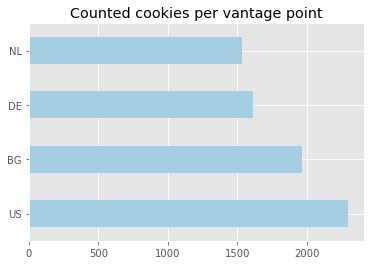

In [16]:
#count all cookies in each VP
count_cookies=cookies.groupby('VP')['name'].count()
print(count_cookies)

#counting all tpd in each VP. there is no difference between cookies and TPD becacause count only counts the values of each column.
tpd_cookies=cookies.groupby('VP')['host'].count()
print(tpd_cookies)

c=cookies['VP'].value_counts()[:10].plot(kind='barh',title='Counted cookies per vantage point', colormap='Paired')
c

          Count
VP TLD         
BG co.uk    506
   com      560
   de       576
   nl       165
   us       156
DE co.uk    499
   com      344
   de       496
   nl       169
   us       104
NL co.uk    430
   com      509
   de       432
   nl        68
   us        98
US co.uk    590
   com      718
   de       595
   nl       196
   us       196


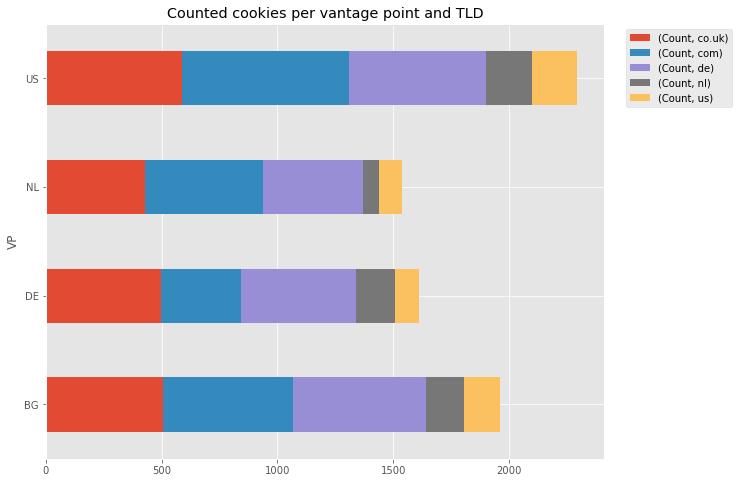

In [17]:
#count all cookies in each VP per TLD
cookies_VP_TLD=cookies.groupby('VP')['TLD'].value_counts().unstack().stack(dropna=False).reset_index(name="Count").set_index(['VP', 'TLD'])
print(cookies_VP_TLD)

#When interpreting this graph it is important to keep in mind that from .com 61 websites were crawled. Other VP were 30 websites
t=cookies_VP_TLD.unstack().plot.barh(stacked=True,figsize=(10, 8),title='Counted cookies per vantage point and TLD', legend=True)
horiz_offset = 1.03
vert_offset = 1.0
t.legend(bbox_to_anchor=(horiz_offset, vert_offset))
plt.savefig('fig',bbox_inches='tight')

                       Count
VP host                     
US demdex.net          275.0
DE demdex.net          150.0
BG adnxs.com           149.0
US adnxs.com           141.0
   krxd.net            134.0
BG krxd.net            100.0
NL adnxs.com            99.0
BG demdex.net           97.0
   casalemedia.com      91.0
DE krxd.net             86.0
NL pubmatic.com         84.0
BG pubmatic.com         79.0
US doubleclick.net      79.0
   adsrvr.org           77.0
DE doubleclick.net      66.0
   adnxs.com            66.0
US bing.com             63.0
DE casalemedia.com      61.0
BG doubleclick.net      61.0
US rlcdn.com            60.0
BG rubiconproject.com   56.0
   adsrvr.org           54.0
NL doubleclick.net      54.0
US casalemedia.com      54.0


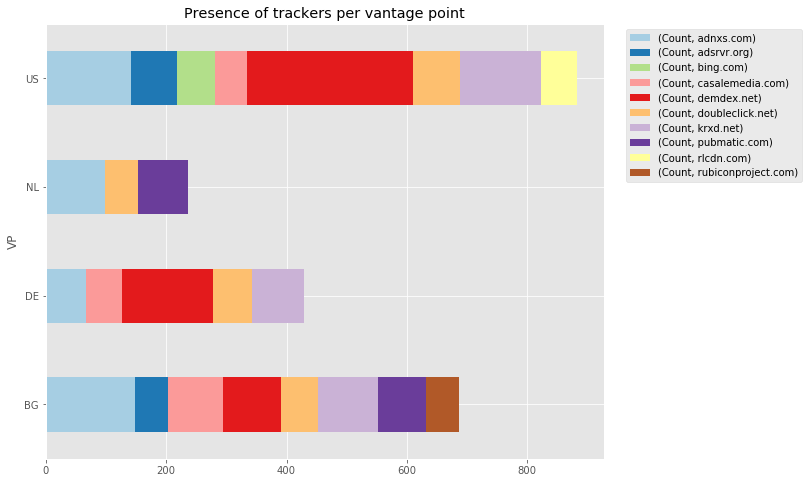

In [18]:
# COUNT OF TOP 24 THIRD PARTY TRACKERS INCLUDING ALL VP  
tpd_count_VP=cookies.groupby('VP')['host'].value_counts().nlargest(24).unstack().stack(dropna=True).reset_index(name="Count").set_index(['VP', 'host']).sort_values(by='Count',ascending=False)
print(tpd_count_VP)

t=tpd_count_VP.unstack().plot.barh(stacked=True,figsize=(10, 8),title='Presence of trackers per vantage point', legend=True, colormap='Paired')
horiz_offset = 1.03
vert_offset = 1.
t.legend(bbox_to_anchor=(horiz_offset, vert_offset))
t


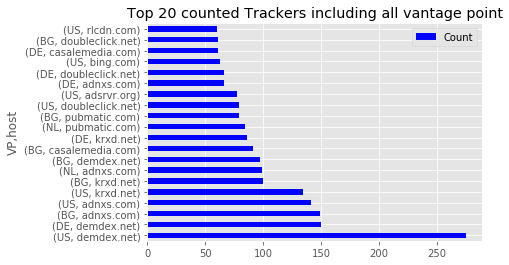

In [19]:
##TOP THIRD PARTY TRACKERS INCLUDING ALL VP
tpd_count_all=cookies.groupby('VP')['host'].value_counts().unstack().stack(dropna=True).reset_index(name="Count").set_index(['VP', 'host']).sort_values(by='Count',ascending=False)
tpd_count_all.iloc[0:20,]
plt.figure(figsize=(8,6))
(tpd_count_all.iloc[0:20,]).plot(kind='barh',title='Top 20 counted Trackers including all vantage point', color='blue')

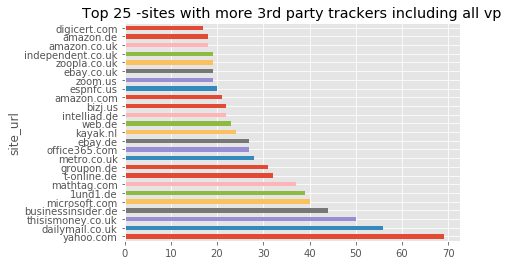

In [20]:
#Sites that contain more 3rd party trackers (mixing all vp-the results)
u_tpd_count=cookies.groupby('site_url')['host'].nunique().sort_values(ascending=False)
#print(u_tpd_count.shape)
#u_tpd_count.describe()

cookies.groupby('site_url')['host'].nunique().sort_values(ascending=False)[:25].plot(kind='barh',title='Top 25 -sites with more 3rd party trackers including all vp')

In [21]:
#Descriptive stats of the counted cookies per VP
cookies.groupby(['VP']).describe()

is_session                                    timediff  \
        count mean  std  min  25%  50%  75%  max    count   
VP                                                          
BG     1963.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1963   
DE     1612.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1612   
NL     1537.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1537   
US     2295.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     2295   

                                                                           \
                        mean                        std               min   
VP                                                                          
BG  557 days 08:26:46.829852  2822 days 03:26:06.061225  30 days 00:00:00   
DE  596 days 12:42:33.325682  3060 days 14:59:15.261239  30 days 00:00:00   
NL  669 days 17:29:47.465842  3247 days 16:08:31.691880  30 days 00:00:00   
US  585 days 11:31:32.952941  2762 days 23:39:29.589550  30 days 00:00:00   

                                                                    \
                  25%                       50%                75%   
VP                                                                   
BG   90 days 00:00:06         364 days 23:59:59  390 days 00:00:00   
DE  180 days 00:00:00  364 days 23:59:59.500000  390 days 00:00:00   
NL   90 days 00:00:06         365 days 00:00:00  390 days 00:00:00   
US  180 days 00:00:00         364 days 23:59:56  390 days 00:00:00   

                         
                    max  
VP                       
BG  99999 days 00:00:00  
DE  99999 days 00:00:00  
NL  99999 days 00:00:00  
US  99999 days 00:00:00

### US -COUNT

                    host  VP
site_url                    
businessinsider.de   165  US
office365.com        150  US
microsoft.com        148  US
kayak.nl             132  US
web.de               109  US


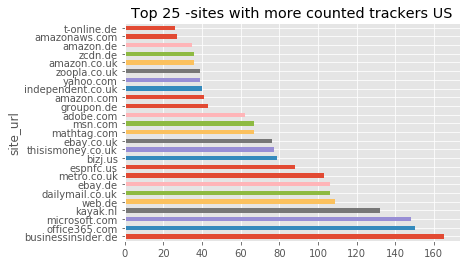

In [22]:
#Websites with more third party domains- VP US
tpd_count_US=cookies[cookies.VP=='US'].sort_values(by='site_url')
df_count_US= pd.DataFrame(data=tpd_count_US)
#df_US.describe()
tpd_count_US=pd.DataFrame(df_count_US.groupby('site_url')['host'].count().sort_values(ascending=False))
#print(tpd_count_US.head())
df_count_US.groupby('site_url')['host'].count().sort_values(ascending=False)[:25].plot(kind='barh',title='Top 25 -sites with more counted trackers US')
tpd_count_US['VP']='US'
print(tpd_count_US.head())


                          Count
VP host                        
US demdex.net               275
   adnxs.com                141
   krxd.net                 134
   doubleclick.net           79
   adsrvr.org                77
   bing.com                  63
   rlcdn.com                 60
   casalemedia.com           54
   bluekai.com               53
   scorecardresearch.com     48
   rubiconproject.com        48
   espn.com                  47
   advertising.com           40
   pubmatic.com              38
   mathtag.com               37
   everesttech.net           36
   facebook.com              35
   taboola.com               35
   adition.com               30
   crwdcntrl.net             30


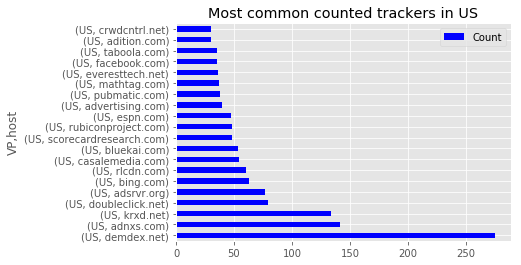

In [23]:
#Most common counted trackers in US
tpd_count_US=df_count_US.groupby('VP')['host'].value_counts().unstack().stack(dropna=True).reset_index(name="Count").set_index(['VP', 'host']).sort_values(by='Count',ascending=False)
print(tpd_count_US.iloc[0:20,])
plt.figure(figsize=(8,6))
(tpd_count_US.iloc[0:20,]).plot(kind='barh',title='Most common counted trackers in US', color='blue')

                    name  VP
site_url                    
businessinsider.de   165  US
office365.com        150  US
microsoft.com        148  US
kayak.nl             132  US
web.de               109  US


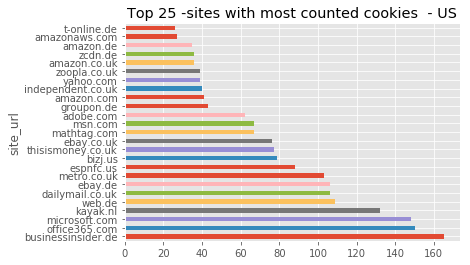

In [24]:
#Websites with most COOKIES - US
counted_cookies_w_US=pd.DataFrame(df_count_US.groupby('site_url')['name'].count().sort_values(ascending=False))
#print(counted_cookies_w_US.head())
df_count_US.groupby('site_url')['name'].count().sort_values(ascending=False)[:25].plot(kind='barh',title='Top 25 -sites with most counted cookies  - US')

counted_cookies_w_US['VP']='US'
print(counted_cookies_w_US.head())

#NOTE> COUNTING DOES NOT MAKE A DIFFERENCE BETWEEN TRACKERS AND COOKIES

### NL  - COUNT

                 host  VP
site_url                 
yahoo.com         149  NL
dailymail.co.uk   119  NL
t-online.de       115  NL
1und1.de           84  NL
mathtag.com        75  NL


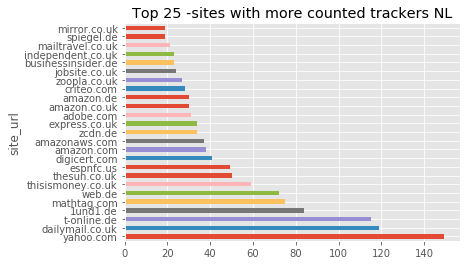

In [25]:
#Websites with more third party domains- VP NL
tpd_count_NL=cookies[cookies.VP=='NL'].sort_values(by='site_url')
#tpd_count_NL.to_csv('und.csv', sep=',')
df_count_NL= pd.DataFrame(data=tpd_count_NL)

tpd_count_NL=pd.DataFrame(df_count_NL.groupby('site_url')['host'].count().sort_values(ascending=False))
df_count_NL.groupby('site_url')['host'].count().sort_values(ascending=False)[:25].plot(kind='barh',title='Top 25 -sites with more counted trackers NL')
tpd_count_NL['VP']='NL'
print(tpd_count_NL.head())

#df_count_NL.describe()
#print(df_count_NL.head())


                          Count
VP host                        
NL adnxs.com                 99
   pubmatic.com              84
   doubleclick.net           54
   demdex.net                49
   casalemedia.com           48
   adsrvr.org                48
   bidswitch.net             41
   scorecardresearch.com     38
   rubiconproject.com        37
   facebook.com              36
   adition.com               35
   adscale.de                30
   espn.com                  29
   google.com                27
   amazon.com                24
   twiago.com                24
   crwdcntrl.net             23
   bing.com                  22
   zenmate.com               21
   advertising.com           20


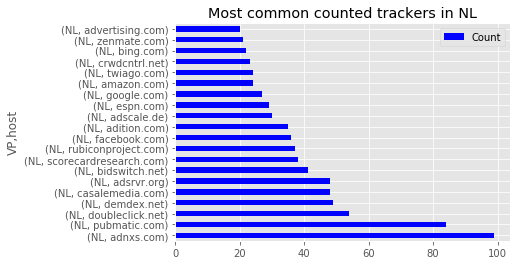

In [26]:
#Most common counted trackers in NL
tpd_count_NL=df_count_NL.groupby('VP')['host'].value_counts().unstack().stack(dropna=True).reset_index(name="Count").set_index(['VP', 'host']).sort_values(by='Count',ascending=False)
print(tpd_count_NL.iloc[0:20,])
plt.figure(figsize=(8,6))
(tpd_count_NL.iloc[0:20,]).plot(kind='barh',title='Most common counted trackers in NL', color='blue')



                 name  VP
site_url                 
yahoo.com         149  NL
dailymail.co.uk   119  NL
t-online.de       115  NL
1und1.de           84  NL
mathtag.com        75  NL


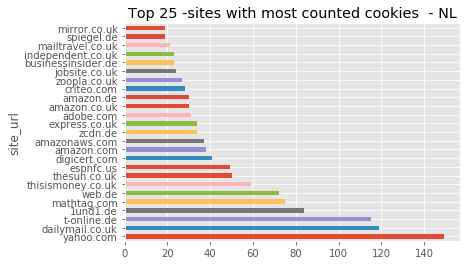

In [27]:
#Websites with most COOKIES - NL
counted_cookies_w_NL=pd.DataFrame(df_count_NL.groupby('site_url')['name'].count().sort_values(ascending=False))
#print(counted_cookies_w_NL.head())
df_count_NL.groupby('site_url')['name'].count().sort_values(ascending=False)[:25].plot(kind='barh',title='Top 25 -sites with most counted cookies  - NL')

counted_cookies_w_NL['VP']='NL'
print(counted_cookies_w_NL.head())



### DE - COUNT

                    host  VP
site_url                    
businessinsider.de   111  DE
kayak.nl              96  DE
dailymail.co.uk       87  DE
ebay.co.uk            84  DE
metro.co.uk           81  DE


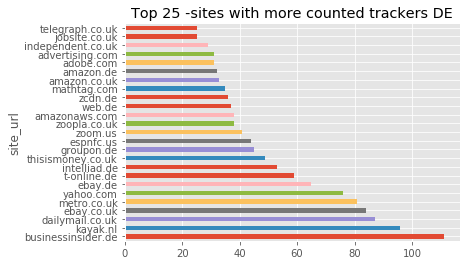

In [28]:
#Websites with more third party domains- VP DE
tpd_count_DE=cookies[cookies.VP=='DE'].sort_values(by='site_url')
df_count_DE= pd.DataFrame(data=tpd_count_DE)
#df_count_DE.describe()
#print(df_count_DE.head())
tpd_count_DE=pd.DataFrame(df_count_DE.groupby('site_url')['host'].count().sort_values(ascending=False))
df_count_DE.groupby('site_url')['host'].count().sort_values(ascending=False)[:25].plot(kind='barh',title='Top 25 -sites with more counted trackers DE')

tpd_count_DE['VP']='DE'
print(tpd_count_DE.head())



                          Count
VP host                        
DE demdex.net               150
   krxd.net                  86
   adnxs.com                 66
   doubleclick.net           66
   casalemedia.com           61
   adsrvr.org                47
   scorecardresearch.com     44
   pubmatic.com              42
   rubiconproject.com        41
   bluekai.com               41
   rlcdn.com                 38
   facebook.com              31
   google.com                30
   espn.com                  30
   exelator.com              29
   adition.com               27
   bidswitch.net             26
   amazon.com                24
   mathtag.com               23
   linkedin.com              22


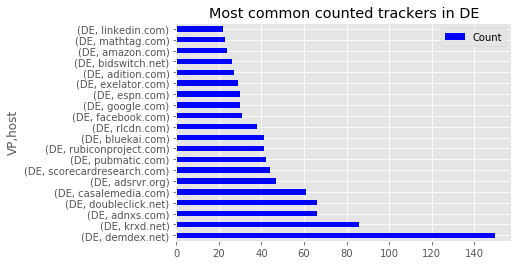

In [29]:
#MOST COMMON COUNTED TRACKERS IN DE
tpd_count_DE=df_count_DE.groupby('VP')['host'].value_counts().unstack().stack(dropna=True).reset_index(name="Count").set_index(['VP', 'host']).sort_values(by='Count',ascending=False)
print(tpd_count_DE.iloc[0:20,])
plt.figure(figsize=(8,6))
(tpd_count_DE.iloc[0:20,]).plot(kind='barh',title='Most common counted trackers in DE', color='blue')



                    name  VP
site_url                    
businessinsider.de   111  DE
kayak.nl              96  DE
dailymail.co.uk       87  DE
ebay.co.uk            84  DE
metro.co.uk           81  DE


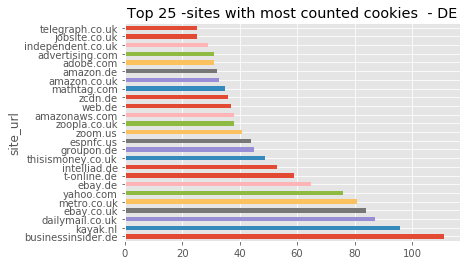

In [30]:
#Websites with most COOKIES - DE
counted_cookies_w_DE=pd.DataFrame(df_count_DE.groupby('site_url')['name'].count().sort_values(ascending=False))
#print(counted_cookies_w_DE.head())
df_count_DE.groupby('site_url')['name'].count().sort_values(ascending=False)[:25].plot(kind='barh',title='Top 25 -sites with most counted cookies  - DE')

counted_cookies_w_DE['VP']='DE'
print(counted_cookies_w_DE.head())



### BG - COUNT

                    host  VP
site_url                    
yahoo.com            184  BG
businessinsider.de   118  BG
ebay.de              104  BG
kayak.nl              97  BG
1und1.de              84  BG


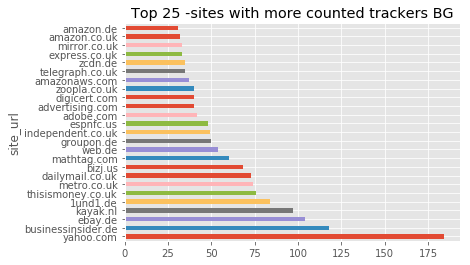

In [31]:
#Websites with more third party domains- VP BG
tpd_count_BG=cookies[cookies.VP=='BG'].sort_values(by='site_url')
df_count_BG= pd.DataFrame(data=tpd_count_BG)
#df_count_BG.describe()
#print(df_count_BG.head())
tpd_count_BG=pd.DataFrame(df_count_BG.groupby('site_url')['host'].count().sort_values(ascending=False))
df_count_BG.groupby('site_url')['host'].count().sort_values(ascending=False)[:25].plot(kind='barh',title='Top 25 -sites with more counted trackers BG')

tpd_count_BG['VP']='BG'
print(tpd_count_BG.head())

                          Count
VP host                        
BG adnxs.com                149
   krxd.net                 100
   demdex.net                97
   casalemedia.com           91
   pubmatic.com              79
   doubleclick.net           61
   rubiconproject.com        56
   adsrvr.org                54
   scorecardresearch.com     46
   crwdcntrl.net             42
   facebook.com              40
   bluekai.com               40
   bidswitch.net             37
   exelator.com              36
   advertising.com           35
   mathtag.com               34
   google.com                33
   360yield.com              33
   rlcdn.com                 28
   espn.co.uk                28


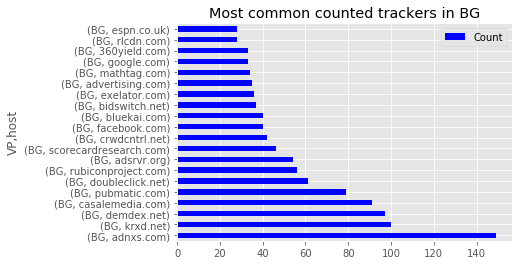

In [32]:
#MOST COMMON COUNTED TRACKERS IN BG
tpd_count_BG=df_count_BG.groupby('VP')['host'].value_counts().unstack().stack(dropna=True).reset_index(name="Count").set_index(['VP', 'host']).sort_values(by='Count',ascending=False)
print(tpd_count_BG.iloc[0:20,])
plt.figure(figsize=(8,6))
(tpd_count_BG.iloc[0:20,]).plot(kind='barh',title='Most common counted trackers in BG', color='blue')






                    name  VP
site_url                    
yahoo.com            184  BG
businessinsider.de   118  BG
ebay.de              104  BG
kayak.nl              97  BG
1und1.de              84  BG


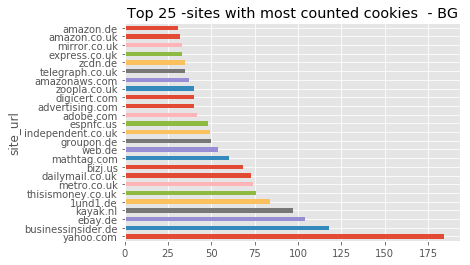

In [33]:
#Websites with most COOKIES - BG
counted_cookies_w_BG=pd.DataFrame(df_count_BG.groupby('site_url')['name'].count().sort_values(ascending=False))
#print(counted_cookies_w_BG.head())
df_count_BG.groupby('site_url')['name'].count().sort_values(ascending=False)[:25].plot(kind='barh',title='Top 25 -sites with most counted cookies  - BG')

counted_cookies_w_BG['VP']='BG'
print(counted_cookies_w_BG.head())




### DEPENDENT VARIABLE: COUNTED TRACKERS & COUNTED COOKIES - JOINING ALL VP

In [34]:
#COUNTED TRACKERS 
tpd_count= pd.concat([tpd_count_US,tpd_count_NL,tpd_count_DE,tpd_count_BG]).reset_index()
tpd_count=tpd_count.sort_values(by='host', ascending=True)
tpd_count.head(20)


,VP,host,Count
252,NL,1rx.io,9
545,DE,1rx.io,2
705,BG,1rx.io,4
123,US,1rx.io,2
184,US,2o7.net,1
606,DE,2o7.net,1
840,BG,2o7.net,1
147,US,33across.com,2
464,DE,360yield.com,10
52,US,360yield.com,8


In [41]:
#COUNTED COOKIES
cookiesdv_count= pd.concat([counted_cookies_w_US,counted_cookies_w_NL,counted_cookies_w_DE,counted_cookies_w_BG]).reset_index()
cookiesdv_count=cookiesdv_count.sort_values(by='site_url')
cookiesdv_count.head(20)


#COUNTING COOKIES AND COUNTING TRACKERS GET THE SAME DATA -CHECK
#check=cookiesdv_count[(cookiesdv_count.site_url=='metro.co.uk')]
#check

,site_url,name,VP
296,metro.co.uk,74,BG
7,metro.co.uk,103,US
160,metro.co.uk,3,NL
197,metro.co.uk,81,DE


BG         Axes(0.1,0.559091;0.363636x0.340909)
DE    Axes(0.536364,0.559091;0.363636x0.340909)
NL             Axes(0.1,0.15;0.363636x0.340909)
US        Axes(0.536364,0.15;0.363636x0.340909)
dtype: object

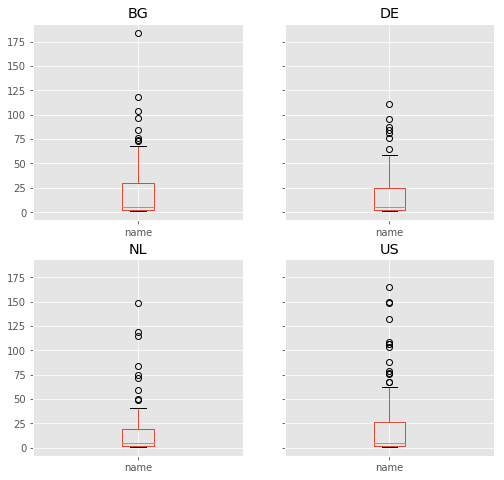

In [36]:
#Boxplot per VP - OUTLIERS are real observations
cookiesdv_count.groupby('VP').boxplot(figsize=[8,8])


In [37]:
#Descriptive stats Counted cookies - Dependend variable
#There is overdispersion the sdv/mean >1
cookiesdv_count.groupby('VP').describe()


name                                                  
   count       mean        std  min  25%  50%   75%    max
VP                                                        
BG  99.0  19.828283  30.518325  1.0  2.0  5.0  30.0  184.0
DE  97.0  16.618557  24.155505  1.0  2.0  5.0  25.0  111.0
NL  95.0  16.178947  26.744249  1.0  2.0  5.0  19.0  149.0
US  98.0  23.418367  37.546651  1.0  2.0  5.0  26.0  165.0

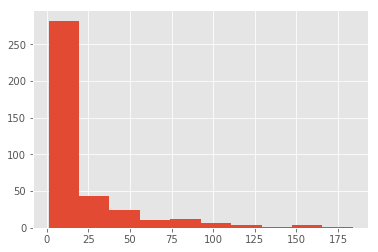

In [38]:
#Histogram of counted cookies - shape of the distribution is skew and non normal - Negative Binomial
#It cannot be poisson because the mean is different form the sd
cookiesdv_count.name.hist()


In [45]:
x=cookiesdv_count.name.kurtosis()
print('Skweness:', x)
y=cookiesdv_count.name.skew()
print('Kurtosis:', y)

Skweness: 6.956271416420012
Kurtosis: 2.5240920225075816
